# Proyek Analisis Data: [Input Nama Dataset]
- Nama: Rama Adji Prasetyo
- Email: [Input Email]
- ID Dicoding: [Input Username]

## Menentukan Pertanyaan Bisnis

- Kota dan provinsi mana yang memiliki jumlah customer terbanyak?
- Berapa persentase pesanan yang diterima oleh pengguna ?
- Apa Metode pembayaran yang paling sering digunakan ?
- Kategori produk apa yang paling sering dibeli?
- Kategori produk mana yang menghasilkan revenue tertinggi?

## Import Semua Packages/Library yang Digunakan

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [63]:
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
geolocation_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv") # need cleaning
product_category_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv") # kayanya ga kepake
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv") # need cleaning
seller_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")


**Insight**
- Terdapat 9 dataset yang berisi data transaksi pada e-commerce.
- 2 dataset memiliki missing value dan perlu dibersihkan, yaitu dataset Orders dan Product.

### Assessing Data

In [64]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [65]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.info()

Jumlah duplikasi:  261831
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [66]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()
order_items_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [67]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [68]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [69]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df["order_status"].unique()
orders_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [70]:
failed_orders = orders_df[orders_df["order_status"].isin(["canceled", "unavailable"])]
succeed_orders  = orders_df[orders_df["order_status"].isin(["delivered", "invoiced", "shipped", "created", "processing", "approved"])]

delivered_orders = succeed_orders[succeed_orders["order_status"] == "delivered"]
shipped_orders = succeed_orders[succeed_orders["order_status"] == "shipped"]
invoiced_orders = succeed_orders[succeed_orders["order_status"] == "invoiced"]
created_orders  = succeed_orders[succeed_orders["order_status"] == "created"]   
processing_orders = succeed_orders[succeed_orders["order_status"] == "processing"]
approved_orders = succeed_orders[succeed_orders["order_status"] == "approved"]
shipped_orders = succeed_orders[succeed_orders["order_status"] == "shipped"]
canceled_orders = failed_orders[failed_orders["order_status"] == "canceled"]
unavailable_orders = failed_orders[failed_orders["order_status"] == "unavailable"]

invalid_canceled_orders = failed_orders[failed_orders["order_delivered_customer_date"].notna()]
invalid_delivered_orders = delivered_orders[
    delivered_orders["order_delivered_carrier_date"].isna() |
    delivered_orders["order_delivered_customer_date"].isna()
]

In [71]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [72]:
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [73]:
invalid_products = products_df[products_df["product_category_name"].isna()]
invalid_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [74]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
seller_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight :**
- Dataset Order
    - Banyak Missing value pada kolom order_delivered_carrier_date dan order_delivered_customer_date
    - Ada transaksi yang memiliki status delivered namun tidak ada data diterima oleh customer dan pengirim atau salah satunya
    - Ada transaksi yang memiliki status canceled namun terdapat tanggal diterima oleh customer
    - Terdapat kesalahan tipe data untuk kolom yang memberikan keterangan waktu
- Dataset Order Reviews
    - Semua pembeli meninggalkan review namun tidak semua meninggalkan title atau pesan
- Dataset Products
    - Terdapat ID yang sama tidak memiliki category, name, desc. hanya memiliki data terkait bentuk fisik seperti weight, height, or length

Selain dataset yang disebutkan diatas, semuanya terlihat normal menurut saya

### Cleaning Data
 -  Berdasarkan insight yang ditemukan pada proses assessing saya akan membersihkan 2 Dataset, yaitu order dan products

> Dataset Order

In [75]:
# mengubah tipe data untuk keterangan waktu
order_datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in order_datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [76]:
# merubah invalid canceled order atau canceled order yang memiliki data tanggal dikirim dan diterima oleh customer

orders_df.loc[
    (orders_df["order_delivered_carrier_date"].notna()) & 
    (orders_df["order_delivered_customer_date"].notna()) & 
    (orders_df["order_status"] == "canceled"),
    "order_status"
] = "delivered"

In [77]:
# mengubah order status berdasarkan order_delivered_carrier_date, dan order_delivered_customer_date
# jika hanya ada order_delivered_carrier_date akan diubah menjadi shipped 
# jika terdapat pengiriman dengan status delivered namun tidak ada tanggal diserahkan kepada carrier, yang saya lakukan adalah menyamakan tanggal pengiriman dengan tanggal terima
# jika ada keduanya akan diubah menjadi delivered

orders_df.loc[
    (orders_df["order_delivered_carrier_date"].isna()) &
    (orders_df["order_delivered_customer_date"].isna()) &
    (orders_df["order_status"] == "delivered"),
    "order_status"
] = "canceled"

orders_df.loc[
    orders_df["order_delivered_carrier_date"].isna() & orders_df["order_delivered_customer_date"].notna(), 
    "order_delivered_carrier_date"
] = orders_df["order_delivered_customer_date"]

orders_df.loc[
    (orders_df["order_delivered_carrier_date"].notna()) & 
    (orders_df["order_delivered_customer_date"].isna()), 
    "order_status"
] = "shipped"


> Dataset Products

In [78]:
# Karena banyak product yang memiliki ID namun tidak ada keterangan apapun, saya memutuskan untuk menghapus data tersebut karena menurut data tersebut tidak bisa digunakan
products_df.dropna(subset=["product_category_name"], inplace=True)

# Terdapat product yang memiliki nama bebes namun tidak memiliki keterangan ukuran apapun, yang saya lakukan adalah mengisi value tsb dengan rata2 nilai bebes lainnya
filtered = products_df[
    (products_df["product_width_cm"].isna())  
]

bebes_avg = products_df.loc[products_df["product_category_name"] == "bebes", ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].mean()

products_df.loc[
    (products_df[["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].isna().any(axis=1)),
    ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
] = bebes_avg.values

products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight :**
- **Dataset Order**
    - Mengubah Tipe Data Waktu:
        - Mengonversi kolom yang berisi keterangan waktu ke dalam format datetime untuk memastikan konsistensi dalam analisis data.
    - Menangani Canceled Order yang Tidak Valid:
        - Jika terdapat pesanan dengan status "canceled", tetapi memiliki tanggal pengiriman dan tanggal diterima oleh pelanggan, maka status tersebut akan diperbaiki.
    - Mengupdate Status Pesanan Berdasarkan Tanggal Pengiriman dan Penerimaan:
        - Jika hanya terdapat order_delivered_carrier_date, maka status akan diubah menjadi "shipped".
        - Jika status "delivered" tetapi tidak memiliki tanggal pengiriman ke carrier, maka tanggal pengiriman akan disamakan dengan tanggal diterima oleh pelanggan.
        - Jika terdapat kedua tanggal (order_delivered_carrier_date dan order_delivered_customer_date), maka status akan tetap "delivered".
- **Dataset Product**
    - Menghapus Produk yang Tidak Memiliki Informasi Penting:
        - Produk yang memiliki ID tetapi tidak memiliki informasi lain dianggap tidak dapat digunakan, sehingga akan dihapus dari dataset.
    - Melengkapi Informasi Produk "Bebes":
        - Produk dengan nama "bebes" yang tidak memiliki informasi ukuran (weight, length, height, width) akan dilengkapi dengan nilai rata-rata dari produk "bebes" lainnya.



## Exploratory Data Analysis (EDA)

### Explore Customer Dataframe

In [79]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [80]:
customers_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [81]:
customers_df.groupby("customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight :**
- Dari data diatas persebaran pelanggan sangat amat banyak, dan sao paulo menjadi kota dengan pelanggan terbanyak
- Begitu juga dengan state, pelanggan paling banyak berasal dari negara bagian SP.

### Explore Orders Dataframe

In [82]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97659,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96476,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:08.249470208,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:29:50.500000,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:09:18,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:30,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [83]:
orders_df["order_status"].value_counts()

order_status
delivered      96476
shipped         1183
unavailable      609
canceled         551
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight :**
- Dari data di atas, terdapat 8 status pemesanan yang didominasi oleh pesanan dengan status "delivered", menandakan pesanan berhasil diterima oleh pembeli.
- Selain itu, terdapat juga status pemesanan yang gagal seperti "unavailable" dan "canceled", yang menunjukkan pesanan tidak dapat diproses atau dibatalkan.

### Explore Data orders and customer

In [84]:
# customer_id_in_orders_df = orders_df.customer_id.tolist()
# customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Inactive")

all_customer = pd.merge(
    customers_df,
    orders_df,
    how="left",
    on="customer_id"
)

# # Mengecek customer yang pernah melakukan pemesanan (Inner Join)
# orders_customers_df = pd.merge(
#     orders_df, 
#     customers_df, 
#     how="left", 
#     on="customer_id"
# )   

# # Mengecek semua customer (termasuk yang tidak pernah memesan) menggunakan Left Join
# all_customers = pd.merge(
#     orders_customers_df,
#     order_items_df,
#     how="left",
#     on="order_id"
# )

# # Mengecek customer yang pernah melakukan pemesanan (Inner Join)
# order_customer_in_order_item = pd.merge(
#     orders_customers_df,
#     order_items_df,
#     how="inner",
#     on="order_id"
# )

# Menemukan customer yang tidak pernah melakukan pemesanan
# never_ordered_customers = all_customers[all_customers["order_item_id"].isna()]

all_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97659 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [85]:
ordered_customer = pd.merge(
    all_customer,
    order_items_df,
    how="inner",
    on="order_id"
)

ordered_customer.groupby("customer_id").agg({
    "order_id": "nunique",
    "price" : "sum",
    "customer_state" : "unique",
    "customer_city" : "unique",
    "freight_value" : "sum"
}).sort_values(by="price", ascending=False)

#total pembelian terbanyak adalah 13440, dan terkecil adalah 0.85

,order_id,price,customer_state,customer_city,freight_value
customer_id,,,,,
1617b1357756262bfa56ab541c47bc16,1,13440.00,[RJ],[rio de janeiro],224.08
ec5b2ba62e574342386871631fafd3fc,1,7160.00,[ES],[vila velha],114.88
c6e2731c5b391845f6800c97401a43a9,1,6735.00,[MS],[campo grande],194.31
f48d464a0baaea338cb25f816991ab1f,1,6729.00,[ES],[vitoria],193.21
3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.00,[SP],[marilia],227.66
...,...,...,...,...,...
d2c63ad286e3ca9dd69218008d61ff81,1,2.90,[PR],[curitiba],8.72
184e8e8e48937145eb96c721ef1f0747,1,2.29,[SP],[sao paulo],7.78
a790343ca6f3fee08112d678b43aa7c5,1,2.20,[SP],[paulinia],7.39


**Insight :**
- Total pembelian tertinggi yang dilakukan oleh pelanggan mencapai $13,440, menunjukkan adanya transaksi dengan nilai besar, sedangkan total pembelian terendah tercatat sebesar $0.85
- Total biaya pengiriman kargo tertinggi tercatat sebesar $224.08, sedangkan biaya pengiriman terendah adalah $18.23
- Pembelian terbesar berdasarkan nilai transaksi dilakukan di kota Rio de Janeiro, negara bagian RJ, sementara pembelian dengan nilai terendah terjadi di kota Duque de Caxias, juga di negara bagian RJ

### Explore Products Dataframe

In [86]:
most_sold_product = pd.merge(
    ordered_customer,
    products_df,
    how="inner",
    on="product_id"
)

most_sold_product.groupby("product_category_name").agg({
    "order_id": "count",
    "price" : "sum",
    "customer_state" : "unique",
    "customer_city" : "unique"
}).sort_values(by="order_id", ascending=False)

,order_id,price,customer_state,customer_city
product_category_name,,,,
cama_mesa_banho,11115,1036988.68,"[SP, GO, RJ, PR, ES, MG, MA, BA, RS, SC, MS, P...","[sao paulo, goiania, resende, guarulhos, sao j..."
beleza_saude,9670,1258681.34,"[RS, RJ, CE, SP, BA, DF, MA, MG, MS, PE, GO, S...","[caxias do sul, rio de janeiro, fortaleza, sao..."
esporte_lazer,8641,988048.97,"[SC, SP, RJ, DF, PR, RS, MG, PA, GO, BA, ES, M...","[jaragua do sul, sao paulo, sumare, guarulhos,..."
moveis_decoracao,8334,729762.49,"[MG, BA, MS, CE, SP, RS, SC, RJ, PR, GO, PE, E...","[belo horizonte, camacari, montes claros, dour..."
informatica_acessorios,7827,911954.32,"[SP, RJ, SC, PR, RN, MG, PA, PE, BA, DF, GO, E...","[sao paulo, rio de janeiro, florianopolis, sao..."
...,...,...,...,...
cds_dvds_musicais,14,730.00,"[SP, RJ, MA, RS]","[sao bernardo do campo, sao paulo, rio de jane..."
la_cuisine,14,2054.99,"[MG, SP, RS, SC, GO]","[belo horizonte, maua, porto alegre, taboao da..."
pc_gamer,9,1545.95,"[RJ, PE, MG, RS, SP]","[rio de janeiro, gravata, montes claros, ibira..."


In [87]:
translated_most_sold_product_category = pd.merge(
    most_sold_product,
    product_category_df,
    how="inner",
    on="product_category_name"
)

translated_most_sold_product_category.groupby("product_category_name_english").agg({
    "order_id": "count",
    "price" : "sum",
    "customer_state" : "unique",
    "customer_city" : "unique"
}).sort_values(by="order_id", ascending=False)

,order_id,price,customer_state,customer_city
product_category_name_english,,,,
bed_bath_table,11115,1036988.68,"[SP, GO, RJ, PR, ES, MG, MA, BA, RS, SC, MS, P...","[sao paulo, goiania, resende, guarulhos, sao j..."
health_beauty,9670,1258681.34,"[RS, RJ, CE, SP, BA, DF, MA, MG, MS, PE, GO, S...","[caxias do sul, rio de janeiro, fortaleza, sao..."
sports_leisure,8641,988048.97,"[SC, SP, RJ, DF, PR, RS, MG, PA, GO, BA, ES, M...","[jaragua do sul, sao paulo, sumare, guarulhos,..."
furniture_decor,8334,729762.49,"[MG, BA, MS, CE, SP, RS, SC, RJ, PR, GO, PE, E...","[belo horizonte, camacari, montes claros, dour..."
computers_accessories,7827,911954.32,"[SP, RJ, SC, PR, RN, MG, PA, PE, BA, DF, GO, E...","[sao paulo, rio de janeiro, florianopolis, sao..."
...,...,...,...,...
arts_and_craftmanship,24,1814.01,"[MG, SC, DF, SP]","[uberlandia, brusque, brasilia, diadema, guaxu..."
la_cuisine,14,2054.99,"[MG, SP, RS, SC, GO]","[belo horizonte, maua, porto alegre, taboao da..."
cds_dvds_musicals,14,730.00,"[SP, RJ, MA, RS]","[sao bernardo do campo, sao paulo, rio de jane..."


**Insight :**
- Kategori product paling sering dibeli adalah "bed_bath_table", dan paling rendah adalah kategori "security and services"

### Explore Order Reviews Dataframe

In [88]:
# order_reviews_df.info()

ordered_customer_reviews = pd.merge(
    ordered_customer,
    order_reviews_df,
    how="inner",
    on="order_id"
)

full_review = ordered_customer_reviews[ordered_customer_reviews["review_comment_title"].notna() & ordered_customer_reviews["review_comment_message"].notna()]
total_full_reviews = full_review.shape[0]

blank_title_or_comment_review = ordered_customer_reviews[ordered_customer_reviews["review_comment_title"].isna() | ordered_customer_reviews["review_comment_message"].isna()]
total_blank_title_or_review = blank_title_or_comment_review.shape[0]
print(f"Total blank review title or message: {total_full_reviews}")
print(f"Total blank review title or message: {total_blank_title_or_review}")


Total blank review title or message: 11532
Total blank review title or message: 100840


**Insight :**
- Jumlah customer yang memberikan review dengan title dan comment sebanyak 11.352, sedangkan sisanya hanya memberikan salah satu atau tidak memberikan keduanya.

### Explore Seller Dataframe

In [89]:
seller_df.groupby("seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
AC       1
PI       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [90]:
seller_df.groupby("seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

**Insight :**
- Lokasi penjual terbanyak berada di kota Sao Paulo, negara bagian SP.

### Explore Order Payment Dataset

In [91]:
ordered_customer_payments = pd.merge(
    ordered_customer,
    order_payments_df,
    how="inner",
    on="order_id"
)

ordered_customer_payments.groupby("payment_type").agg({
    "order_id": "count",
    "price" : "sum",
    "customer_state" : "unique",
}).sort_values(by="order_id", ascending=False)

,order_id,price,customer_state
payment_type,,,
credit_card,86769,10974357.30,"[SP, MG, RJ, RS, PA, SC, GO, PR, ES, BA, MA, M..."
boleto,22867,2391525.66,"[SP, MG, DF, RS, RJ, MA, PR, SC, MT, ES, BA, A..."
voucher,6274,659473.64,"[SP, PR, RJ, PA, MG, DF, BA, MS, RS, PE, CE, G..."
debit_card,1691,183758.74,"[SC, PR, RJ, BA, SP, MG, PE, PB, RS, ES, CE, G..."


**Insight :**
-  Tipe pembayaran paling sering digunakan adalah credit card, dan disusul oleh boleto

In [92]:
all_df = pd.merge(
    ordered_customer,
    order_payments_df,
    how="inner",
    on="order_id"
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
69718,d97fad07a651f184b161908a56958e67,234d95ca4b3faabb37d79dfb5e85c8ee,86280,urai,PR,ae820ecd285ee7d0db7eac6f69049b36,delivered,2018-05-11 13:19:52,2018-05-11 13:37:03,2018-05-15 14:20:00,...,1,e0d64dcfaa3b6db5c54ca298ae101d05,2eb70248d66e0e3ef83659f71b244378,2018-05-17 13:37:03,142.00,18.87,1,credit_card,3,160.87
16759,7ceadfd26cb54dc65928c90a81f0fce7,dbeae02e52dfaffe3cc36d0e63d11812,2847,sao paulo,SP,f16aa03fddf358ebc2203c03a5ba1d48,delivered,2018-07-17 00:04:20,2018-07-17 20:10:14,2018-07-18 11:29:00,...,1,5c2bb11cf2149bd4d9fffcc1246458c3,dbc22125167c298ef99da25668e1011f,2018-07-19 20:10:14,98.90,14.99,1,voucher,1,113.89
83497,e7f5b701d99a5eb91e57a970a75640f0,05530f12381a5556c040029ac0036a18,13632,pirassununga,SP,58a4317c14bcba43d0cf161f17e9db2b,delivered,2017-01-30 11:55:23,2017-01-30 12:33:52,2017-02-01 11:07:58,...,1,77cc62dc80ebe12a0452d1ce0565acdc,218d46b86c1881d022bce9c68a7d4b15,2017-02-03 11:55:23,113.00,18.00,2,voucher,1,12.95
53928,0f8241184942ac488940fe4fdbb6ec84,1cc6ca3e40bc03bcd2e554fbe370433e,40444,salvador,BA,f3069a416e71d0fd68d9489752b6fe41,processing,2017-10-01 15:33:50,2017-10-01 15:50:55,NaT,...,1,4d88bf79cfba786c4f220da5869dbd0b,46dc3b2cc0980fb8ec44634e21d2718e,2017-10-05 15:50:55,349.99,41.72,1,credit_card,6,391.71
107987,77e495840d1437dc483ce6e82182dbd4,14e5f24414b4fbadbe2f3dc85e1baf96,83507,almirante tamandare,PR,5f5a9ba3e0190ff4773314db075b930d,delivered,2017-08-22 19:39:56,2017-08-22 19:55:47,2017-08-25 20:14:32,...,1,c9f9bd4084bc85b95e01d21218e3e85d,c3cfdc648177fdbbbb35635a37472c53,2017-08-30 19:55:47,49.90,9.74,1,credit_card,3,59.64


## Visualization & Explanatory Analysis

### Kota mana yang memiliki jumlah customer terbanyak?

C:\Users\Rama\AppData\Local\Temp\ipykernel_4896\2956232892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


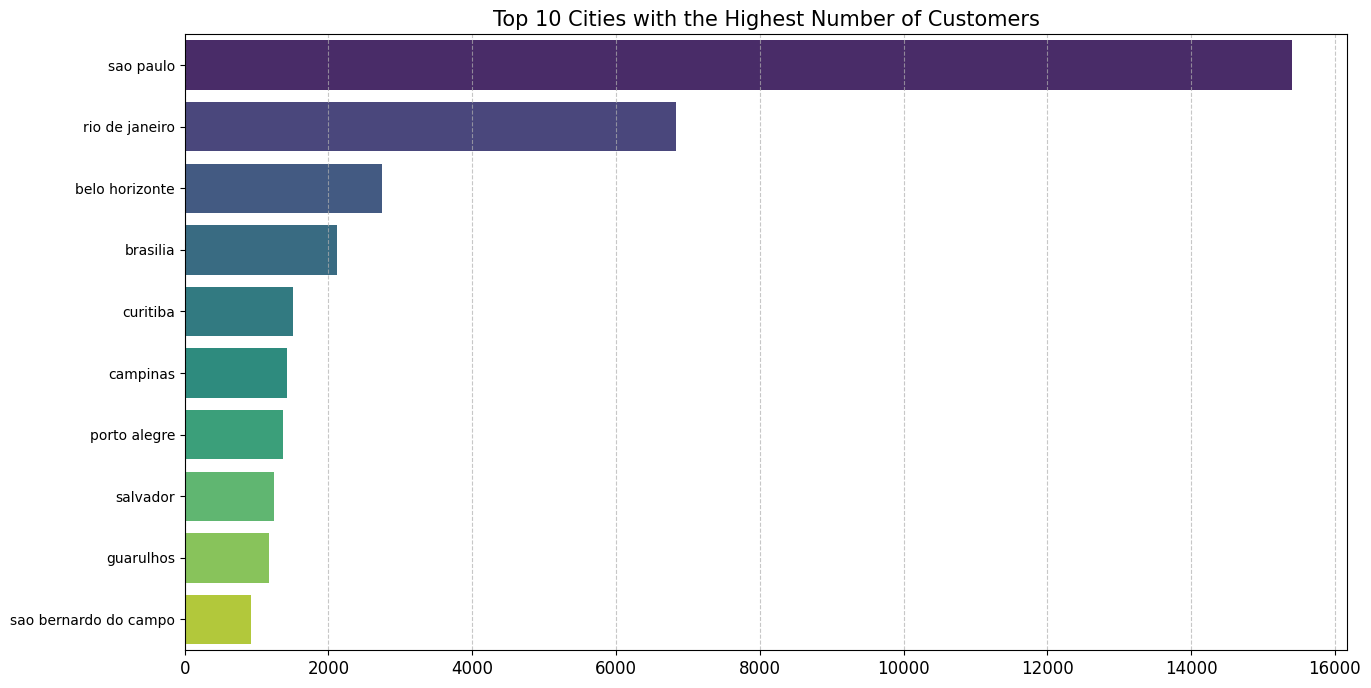

In [93]:
bycity_df = all_df.groupby("customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id" : "customer_count"
}, inplace=True)

plt.figure(figsize=(15, 8))

sns.barplot(
    y="customer_city",
    x="customer_count",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10), 
    palette="viridis"
)

plt.title("Top 10 Cities with the Highest Number of Customers", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Berapa persentase pesanan yang diterima oleh pengguna ?

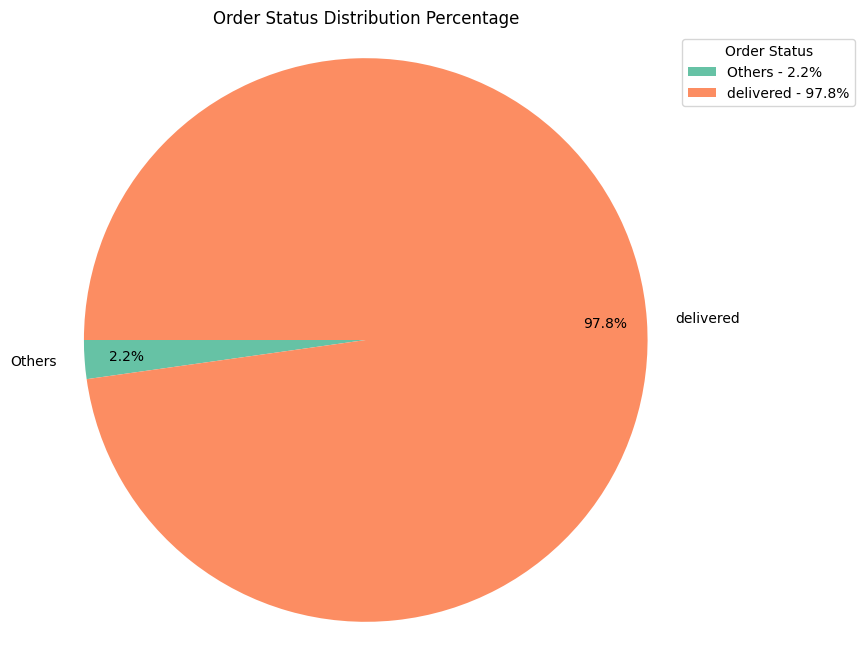

In [94]:
byorder_stat = all_df.groupby("order_status")["order_id"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 8))

# menggabungkan semua kategori selain "delivered" menjadi "Others"
byorder_stat["order_status"] = byorder_stat["order_status"].apply(lambda x: x if x == "delivered" else "Others")

# Grouping ulang
byorder_stat = byorder_stat.groupby("order_status")["order_id"].sum().reset_index()

# Hitung persentase
total_orders = byorder_stat["order_id"].sum()
byorder_stat["percentage"] = (byorder_stat["order_id"] / total_orders) * 100

plt.pie(
    byorder_stat["order_id"],
    labels=byorder_stat["order_status"],
    autopct="%1.1f%%",
    pctdistance=0.85,
    startangle=180,
    colors=sns.color_palette("Set2", len(byorder_stat)),
)

# Legend
plt.legend(
    labels=[f"{row['order_status']} - {row['percentage']:.1f}%" for _, row in byorder_stat.iterrows()],
    loc="upper right",
    bbox_to_anchor=(1.3, 1),
    title="Order Status"
)

plt.title("Order Status Distribution Percentage")
plt.axis("equal")
plt.show()




### Apa Metode pembayaran yang paling sering digunakan ?

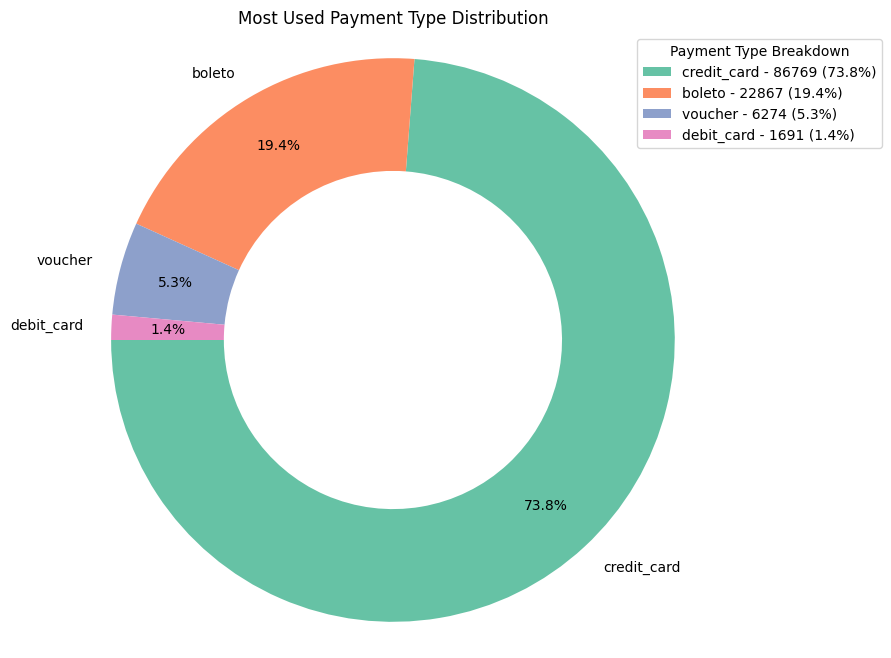

In [95]:
most_used_payment_type = all_df["payment_type"].value_counts()

# Hitung Persentase
total_payment = most_used_payment_type.sum()
percentage = (most_used_payment_type / total_payment) * 100

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    most_used_payment_type,
    labels=most_used_payment_type.index,
    autopct="%1.1f%%",
    pctdistance=0.8,
    startangle=180,
    colors=sns.color_palette("Set2", len(most_used_payment_type)),
    wedgeprops=dict(width=0.4)
)

# Tambahkan Legend dengan Persentase
legend_labels = [f"{payment} - {value} ({perc:.1f}%)" for payment, value, perc in zip(most_used_payment_type.index, most_used_payment_type, percentage)]
plt.legend(
    legend_labels,
    loc="upper right",
    bbox_to_anchor=(1.3, 1),
    title="Payment Type Breakdown"
)

plt.title("Most Used Payment Type Distribution")
plt.axis("equal")
plt.show()



### Kategori produk apa yang paling sering dibeli?

C:\Users\Rama\AppData\Local\Temp\ipykernel_4896\1805319195.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


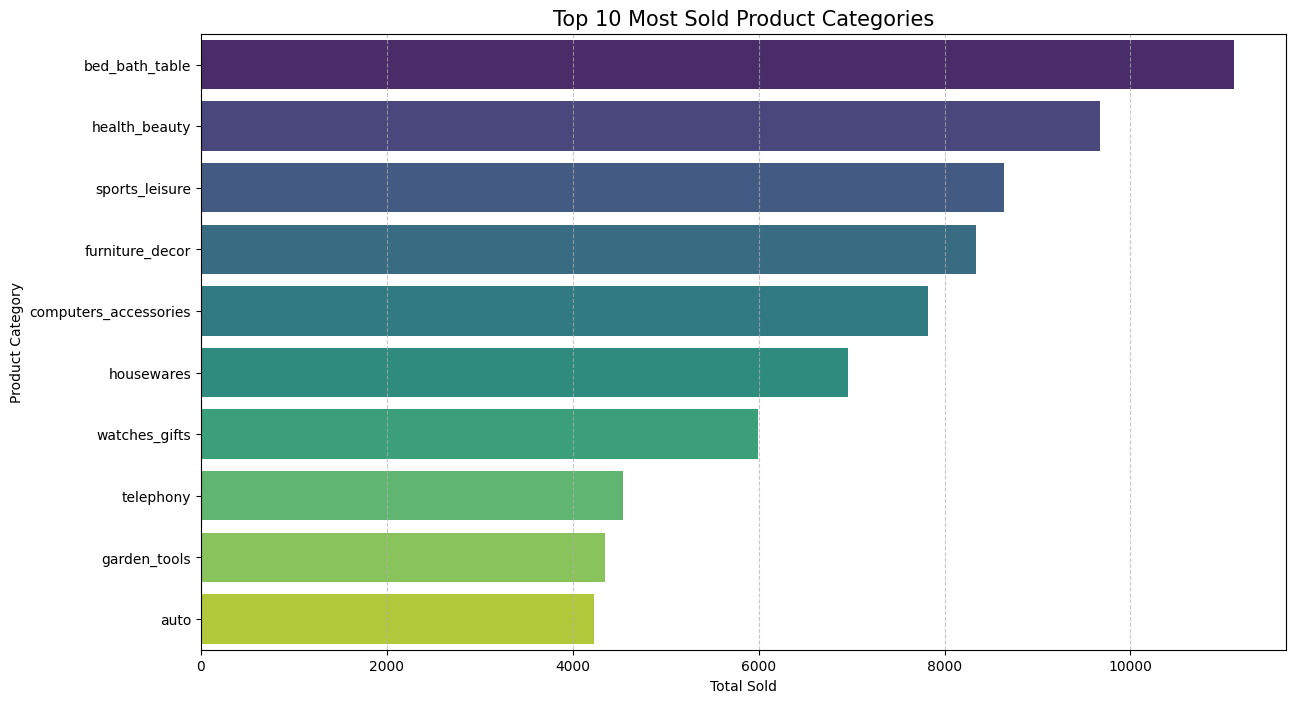

In [96]:
# Agregasi Data
most_sold_product = translated_most_sold_product_category.groupby("product_category_name_english").agg({
    "order_id": "count",
    "price": "sum",
    "customer_state": "unique",
    "customer_city": "unique"
}).sort_values(by="order_id", ascending=False).reset_index()

plt.figure(figsize=(14, 8))

sns.barplot(
    y="product_category_name_english",
    x="order_id",
    data=most_sold_product.head(10), 
    palette="viridis"
)

plt.title("Top 10 Most Sold Product Categories", fontsize=15)
plt.xlabel("Total Sold")
plt.ylabel("Product Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### Kategori produk mana yang menghasilkan revenue tertinggi?

C:\Users\Rama\AppData\Local\Temp\ipykernel_4896\4017500581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


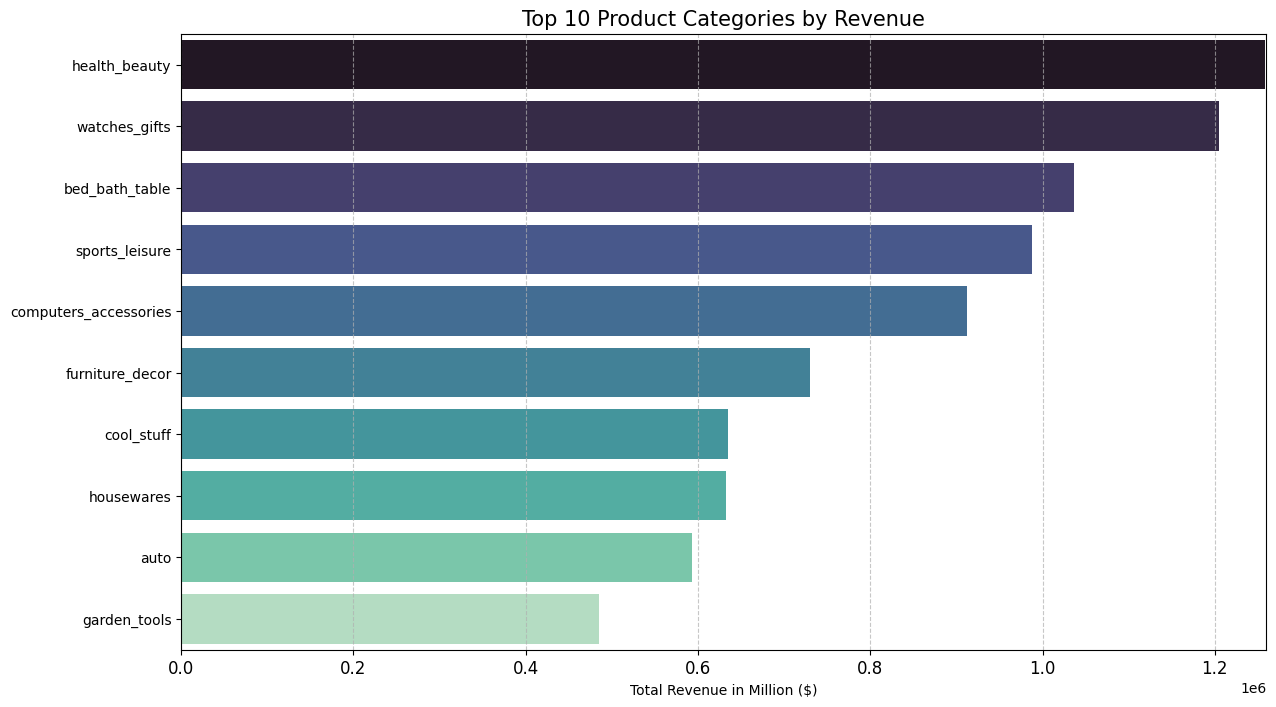

In [97]:
most_sold_product = translated_most_sold_product_category.groupby("product_category_name_english").agg({
    "order_id": "count",
    "price": "sum", 
    "customer_state": "unique",
    "customer_city": "unique"
}).sort_values(by="price", ascending=False).reset_index()

plt.figure(figsize=(14, 8))

sns.barplot(
    y="product_category_name_english",
    x="price",
    data=most_sold_product.head(10),
    palette="mako"
)

plt.title("Top 10 Product Categories by Revenue", fontsize=15)
plt.xlabel("Total Revenue in Million ($)")
plt.ylabel(None)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tick_params(axis='x', labelsize=12)
plt.xlim(0, most_sold_product["price"].max() + 1000)
plt.show()

## Analisis Lanjutan

In [98]:
geolocation_unique_df = geolocation_df.groupby("geolocation_zip_code_prefix").first().reset_index()

customer_in_geolocation = pd.merge(
    all_df,
    geolocation_unique_df,
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

<Figure size 1500x1000 with 0 Axes>

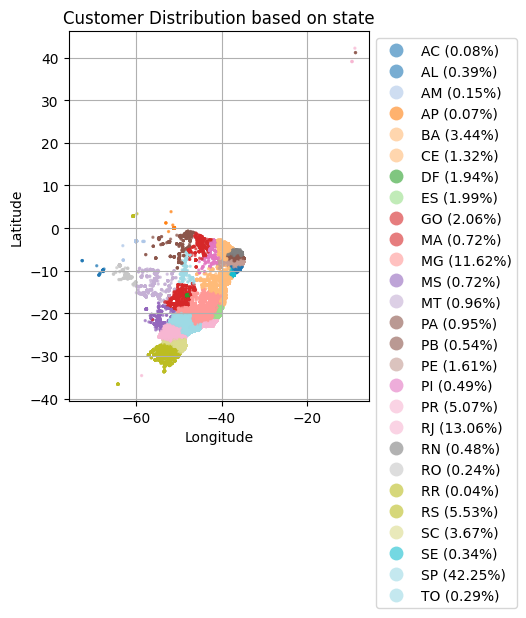

In [99]:
from shapely.geometry import Point

# Create geometry column
customer_in_geolocation["geometry"] = customer_in_geolocation.apply(lambda x: Point(x["geolocation_lng"], x["geolocation_lat"]), axis=1)

# Convert to GeoDataFrame
geo_df = gpd.GeoDataFrame(customer_in_geolocation, geometry="geometry")

# Calculate percentage of customers per state
state_counts = geo_df['customer_state'].value_counts()
total_customers = len(geo_df)
state_percentages = (state_counts / total_customers) * 100

# Plot data with color based on customer_state
plt.figure(figsize=(15, 10))
ax = geo_df.plot(marker='o', column='customer_state', cmap='tab20', markersize=2, alpha=0.6, legend=True)

# Move legend position
ax.get_legend().set_bbox_to_anchor((1, 1))

# Add percentage labels to the legend
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        state = text.get_text()
        if state in state_percentages:
            text.set_text(f"{state} ({state_percentages[state]:.2f}%)")

plt.title("Customer Distribution based on state")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()



## Conclusion

- Kota dengan jumlah customer terbanyak adalah Sao Paulo, Hal ini menunjukkan bahwa area tersebut memiliki potensi pasar yang tinggi.
- Persentase pesanan yang berhasil diterima oleh pengguna sebesar 97.8% dari total pesanan yang dilakukan. Angka ini menunjukkan tingkat keberhasilan layanan dalam memenuhi pesanan
- Metode pembayaran yang paling sering digunakan adalah Credit Card, yang digunakan sebanyak 86.769 kali, menandakan preferensi pelanggan terhadap metode tersebut.
- Kategori produk yang paling sering dibeli adalah Bed, Bath, Table, dengan total pembelian lebih dari 10.000 unit. Hal ini menunjukkan bahwa produk tersebut memiliki permintaan yang tinggi di pasar.
- Kategori produk yang menghasilkan revenue tertinggi adalah Health Beauty dengan total pendapatan lebih dari 1.2 juta Dollar. Ini menunjukkan bahwa kategori tersebut memberikan kontribusi signifikan terhadap total pendapatan para penjual dan perusahaan ecommerce sebagai pihak ke-3.